In [ ]:
%pwd

'/content'

In [ ]:
!unzip clipped_dataset.zip

Archive:  clipped_dataset.zip
   creating: Datasets_Hackathon/
  inflating: __MACOSX/._Datasets_Hackathon  
  inflating: Datasets_Hackathon/.DS_Store  
  inflating: __MACOSX/Datasets_Hackathon/._.DS_Store  
  inflating: Datasets_Hackathon/Readme_Datasets.docx  
  inflating: __MACOSX/Datasets_Hackathon/._Readme_Datasets.docx  
  inflating: Datasets_Hackathon/LCT_MCD12_User_Guide_V6.pdf  
  inflating: __MACOSX/Datasets_Hackathon/._LCT_MCD12_User_Guide_V6.pdf  
   creating: Datasets_Hackathon/Modis_Land_Cover_Data/
  inflating: __MACOSX/Datasets_Hackathon/._Modis_Land_Cover_Data  
   creating: Datasets_Hackathon/Streamwater_Line_Road_Network/
  inflating: __MACOSX/Datasets_Hackathon/._Streamwater_Line_Road_Network  
   creating: Datasets_Hackathon/Admin_layers/
  inflating: __MACOSX/Datasets_Hackathon/._Admin_layers  
   creating: Datasets_Hackathon/Climate_Precipitation_Data/
  inflating: __MACOSX/Datasets_Hackathon/._Climate_Precipitation_Data  
   creating: Datasets_Hackathon/MODIS_Gro

# MODIS LAND COVER

In [ ]:
!pip install rasterio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 47.6 MB/s eta 0:00:00


Data shape: (769, 565)
Unique values: [-128    7   10   12   13   16]


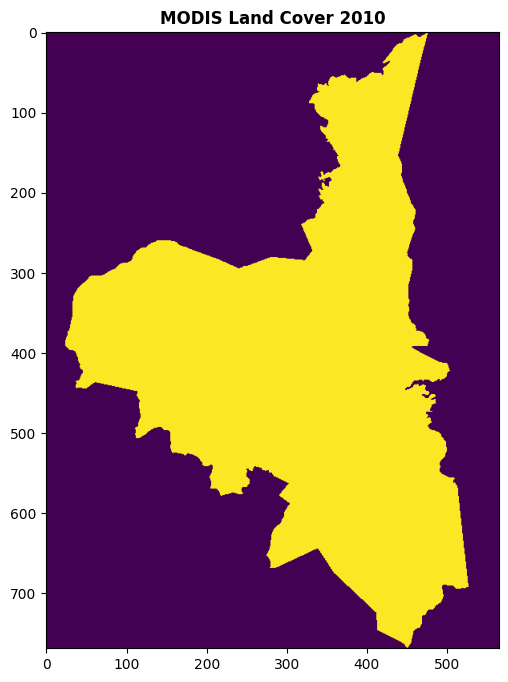

RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

<Figure size 640x480 with 0 Axes>

In [ ]:
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
import os

# Path to your data folder
data_folder = "/content/Datasets_Hackathon/Modis_Land_Cover_Data"

# Function to visualize a single MODIS Land Cover file
def visualize_modis_landcover(tif_file, title):
    # Open the TIFF file
    with rasterio.open(tif_file) as src:
        # Read the data
        landcover_data = src.read(1)  # Read the first band

        # Get basic information about the data
        print(f"Data shape: {landcover_data.shape}")
        print(f"Unique values: {np.unique(landcover_data)}")

        # Create a simple color map for land cover classes
        # You might want to customize this based on MODIS land cover classification scheme
        n_classes = len(np.unique(landcover_data))
        colors = plt.cm.viridis(np.linspace(0, 1, n_classes))
        cmap = ListedColormap(colors)

        # Plot the data
        plt.figure(figsize=(12, 8))
        show(landcover_data, cmap=cmap, title=title)
        plt.colorbar(label='Land Cover Class')
        plt.tight_layout()
        plt.show()

# Visualize 2010 data
tif_2010 = os.path.join(data_folder, "2010LCT.tif")
if os.path.exists(tif_2010):
    visualize_modis_landcover(tif_2010, "MODIS Land Cover 2010")

# Visualize 2011 data
tif_2011 = os.path.join(data_folder, "2011LCT.tif")
if os.path.exists(tif_2011):
    visualize_modis_landcover(tif_2011, "MODIS Land Cover 2011")

# To compare the two years, we can visualize them side by side
def compare_years(tif_2010, tif_2011):
    fig, axes = plt.subplots(1, 2, figsize=(20, 8))

    with rasterio.open(tif_2010) as src_2010:
        data_2010 = src_2010.read(1)
        n_classes = len(np.unique(data_2010))
        cmap = ListedColormap(plt.cm.viridis(np.linspace(0, 1, n_classes)))
        show(data_2010, cmap=cmap, ax=axes[0], title="Land Cover 2010")

    with rasterio.open(tif_2011) as src_2011:
        data_2011 = src_2011.read(1)
        show(data_2011, cmap=cmap, ax=axes[1], title="Land Cover 2011")

    plt.tight_layout()
    plt.show()

    # Optionally calculate and visualize the difference between years
    if data_2010.shape == data_2011.shape:
        plt.figure(figsize=(12, 8))
        diff = data_2011.astype(int) - data_2010.astype(int)
        plt.imshow(diff, cmap='RdBu', vmin=-5, vmax=5)
        plt.colorbar(label='Change (2011 - 2010)')
        plt.title("Land Cover Change 2010 to 2011")
        plt.tight_layout()
        plt.show()

# Compare both years if both files exist
if os.path.exists(tif_2010) and os.path.exists(tif_2011):
    compare_years(tif_2010, tif_2011)

Metadata: {'driver': 'GTiff', 'dtype': 'uint16', 'nodata': 65535.0, 'width': 565, 'height': 769, 'count': 1, 'crs': CRS.from_wkt('PROJCS["unnamed",GEOGCS["GCS_Unknown_datum_based_upon_the_custom_spheroid",DATUM["D_Not_specified_based_on_custom_spheroid",SPHEROID["Custom_spheroid",6371007.181,0]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Sinusoidal"],PARAMETER["longitude_of_center",0],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'), 'transform': Affine(463.31271652749996, 0.0, -1378818.64438684,
       0.0, -463.31271652749996, 2036259.3891393621)}


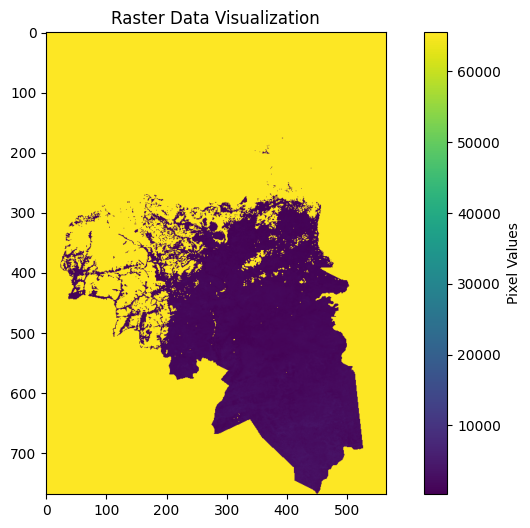

In [ ]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np

file_path = "/content/Datasets_Hackathon/MODIS_Gross_Primary_Production_GPP/2010_GP.tif"

with rasterio.open(file_path) as dataset:
    # Read the first band (assuming single-band raster)
    raster_data = dataset.read(1)

    # Print metadata
    print("Metadata:", dataset.meta)

    # Display raster
    plt.figure(figsize=(10, 6))
    plt.imshow(raster_data, cmap='viridis')
    plt.colorbar(label="Pixel Values")
    plt.title("Raster Data Visualization")
    plt.show()

In [ ]:
!pip install dbfread
!apt install ace_tools

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package ace_tools


In [ ]:
import pandas as pd
from dbfread import DBF

# Path to the VAT table
dbf_path = "/content/Datasets_Hackathon/MODIS_Gross_Primary_Production_GPP/2010_GP.tif.vat.dbf"

# Read the DBF file
table = DBF(dbf_path)
df = pd.DataFrame(iter(table))

# Display the first few rows
import ace_tools as tools
tools.display_dataframe_to_user(name="Value Attribute Table", dataframe=df)


ModuleNotFoundError: No module named 'ace_tools'

In [ ]:
import xml.etree.ElementTree as ET

# Load XML file
xml_path = "/content/Datasets_Hackathon/MODIS_Gross_Primary_Production_GPP/2010_GP.tif.xml"

tree = ET.parse(xml_path)
root = tree.getroot()

# Extract key metadata
metadata = {
    "Creation Date": root.find(".//CreaDate").text if root.find(".//CreaDate") is not None else "N/A",
    "Creation Time": root.find(".//CreaTime").text if root.find(".//CreaTime") is not None else "N/A",
    "ArcGIS Format": root.find(".//ArcGISFormat").text if root.find(".//ArcGISFormat") is not None else "N/A",
}

print("Metadata Extracted:", metadata)

Metadata Extracted: {'Creation Date': '20250311', 'Creation Time': '12231600', 'ArcGIS Format': '1.0'}


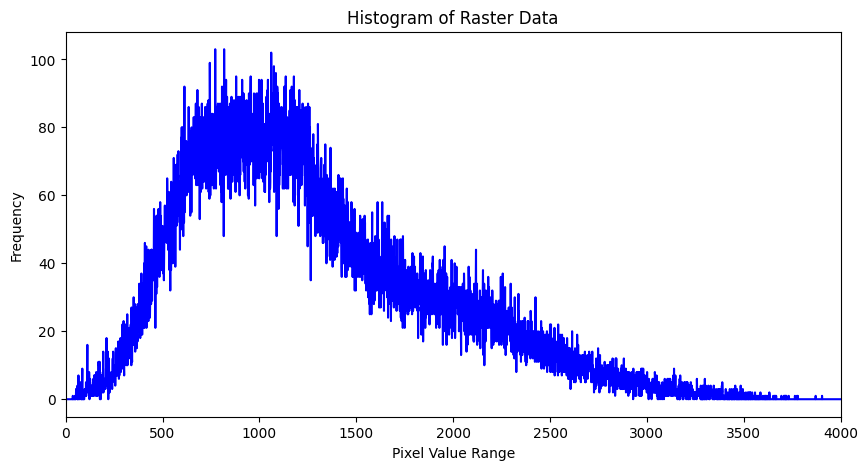

In [ ]:
# Load aux.xml file
aux_xml_path = "/content/Datasets_Hackathon/MODIS_Gross_Primary_Production_GPP/2010_GP.tif.aux.xml"

tree = ET.parse(aux_xml_path)
root = tree.getroot()

# Extract histogram counts
hist_counts = root.find(".//HistCounts").text if root.find(".//HistCounts") is not None else None

if hist_counts:
    hist_values = list(map(int, hist_counts.split("|")))
    hist_values.pop(-1)
    # Plot Histogram
    plt.figure(figsize=(10, 5))
    plt.plot(hist_values, color='blue')
    plt.xlim(0, 4000)
    plt.title("CO₂ Absorption Map (kg_C/m²/year)")
    plt.xlabel("Pixel Value Range")
    plt.ylabel("Frequency")
    plt.show()
else:
    print("No histogram data found.")


In [ ]:
len(hist_values)
print(max(hist_values))
print(min(hist_values))
print(last_nonzero_index(hist_values))

103
0
3904


In [ ]:
def last_nonzero_index(lst):
    for i in range(len(lst) - 1, -1, -1):  # Iterate from the end to the start
        if lst[i] > 0:
            return i  # Return the index of the last non-zero value
    return None

In [ ]:
raster_data

array([[65535, 65535, 65535, ..., 65535, 65535, 65535],
       [65535, 65535, 65535, ..., 65535, 65535, 65535],
       [65535, 65535, 65535, ..., 65535, 65535, 65535],
       ...,
       [65535, 65535, 65535, ..., 65535, 65535, 65535],
       [65535, 65535, 65535, ..., 65535, 65535, 65535],
       [65535, 65535, 65535, ..., 65535, 65535, 65535]], dtype=uint16)

In [ ]:
with rasterio.open("/content/Datasets_Hackathon/MODIS_Gross_Primary_Production_GPP/2010_GP.tif") as dataset:
    print("Raster Bounds:", dataset.bounds)
    print("Pixel Size:", dataset.res)

Raster Bounds: BoundingBox(left=-1378818.64438684, bottom=1679971.9101297148, right=-1117046.9595488026, top=2036259.3891393621)
Pixel Size: (463.31271652749996, 463.31271652749996)


In [ ]:
import numpy as np
import rasterio

# Define the masked output file
masked_output_raster = "/content/Datasets_Hackathon/MODIS_Gross_Primary_Production_GPP/2010_GP_WGS84_masked.tif"

with rasterio.open("/content/Datasets_Hackathon/MODIS_Gross_Primary_Production_GPP/2010_GP.tif") as src:
    raster_data = src.read(1)  # Read the first band
    nodata_value = 65533  # Define no data value

    # Create a mask (set No Data pixels to NaN)
    raster_data = np.where(raster_data >= nodata_value, np.nan, raster_data)

    # Save the new masked raster
    new_meta = src.meta.copy()
    new_meta.update(dtype=rasterio.float32, nodata=np.nan)

    with rasterio.open(masked_output_raster, "w", **new_meta) as dst:
        dst.write(raster_data.astype(rasterio.float32), 1)

print("✅ Masking completed! Saved as:", masked_output_raster)

✅ Masking completed! Saved as: /content/Datasets_Hackathon/MODIS_Gross_Primary_Production_GPP/2010_GP_WGS84_masked.tif


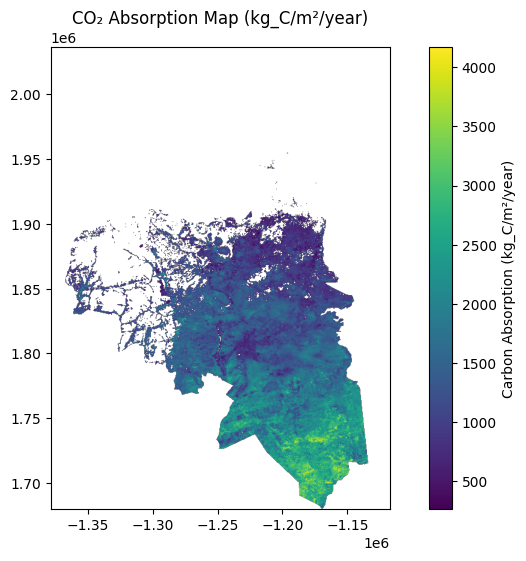

In [ ]:
import matplotlib.pyplot as plt
from rasterio.plot import show

# Open the masked raster
with rasterio.open(masked_output_raster) as src:
    fig, ax = plt.subplots(figsize=(10, 6))
    show(src, ax=ax, cmap="viridis")  # Use "viridis" color map for visualization
    plt.title("CO₂ Absorption Map (kg_C/m²/year)")
    plt.colorbar(ax.images[0], label="Carbon Absorption (kg_C/m²/year)")
    plt.show()


In [ ]:
unique_values, counts = np.unique(raster_data, return_counts=True)

print("Unique Values:", unique_values)

Unique Values: [  266.   303.   315. ...  4170. 65535.    nan]


In [ ]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np

file_path = "/content/Datasets_Hackathon/MODIS_Gross_Primary_Production_GPP/2010_GP.tif"

with rasterio.open(file_path) as dataset:
    # Read the first band (assuming single-band raster)
    raster_data = dataset.read(1)

    # Print metadata
    print("Metadata:", dataset.meta)

    # Display raster
    plt.figure(figsize=(10, 6))
    plt.imshow(raster_data, cmap='viridis')
    plt.colorbar(label="Pixel Values")
    plt.title("Raster Data Visualization")
    plt.show()

In [ ]:
!pip install dbfread
!apt install ace_tools

In [ ]:
import pandas as pd
from dbfread import DBF

# Path to the VAT table
dbf_path = "/content/Datasets_Hackathon/MODIS_Gross_Primary_Production_GPP/2010_GP.tif.vat.dbf"

# Read the DBF file
table = DBF(dbf_path)
df = pd.DataFrame(iter(table))

# Display the first few rows
import ace_tools as tools
tools.display_dataframe_to_user(name="Value Attribute Table", dataframe=df)


In [ ]:
import xml.etree.ElementTree as ET

# Load XML file
xml_path = "/content/Datasets_Hackathon/MODIS_Gross_Primary_Production_GPP/2010_GP.tif.xml"

tree = ET.parse(xml_path)
root = tree.getroot()

# Extract key metadata
metadata = {
    "Creation Date": root.find(".//CreaDate").text if root.find(".//CreaDate") is not None else "N/A",
    "Creation Time": root.find(".//CreaTime").text if root.find(".//CreaTime") is not None else "N/A",
    "ArcGIS Format": root.find(".//ArcGISFormat").text if root.find(".//ArcGISFormat") is not None else "N/A",
}

print("Metadata Extracted:", metadata)

In [ ]:
# Load aux.xml file
aux_xml_path = "/content/Datasets_Hackathon/MODIS_Gross_Primary_Production_GPP/2010_GP.tif.aux.xml"

tree = ET.parse(aux_xml_path)
root = tree.getroot()

# Extract histogram counts
hist_counts = root.find(".//HistCounts").text if root.find(".//HistCounts") is not None else None

if hist_counts:
    hist_values = list(map(int, hist_counts.split("|")))
    hist_values.pop(-1)
    # Plot Histogram
    plt.figure(figsize=(10, 5))
    plt.plot(hist_values, color='blue')
    plt.xlim(0, 4000)
    plt.title("CO₂ Absorption Map (kg_C/m²/year)")
    plt.xlabel("Pixel Value Range")
    plt.ylabel("Frequency")
    plt.show()
else:
    print("No histogram data found.")


In [ ]:
len(hist_values)
print(max(hist_values))
print(min(hist_values))
print(last_nonzero_index(hist_values))

In [ ]:
def last_nonzero_index(lst):
    for i in range(len(lst) - 1, -1, -1):  # Iterate from the end to the start
        if lst[i] > 0:
            return i  # Return the index of the last non-zero value
    return None

In [ ]:
raster_data

In [ ]:
with rasterio.open("/content/Datasets_Hackathon/MODIS_Gross_Primary_Production_GPP/2010_GP.tif") as dataset:
    print("Raster Bounds:", dataset.bounds)
    print("Pixel Size:", dataset.res)

In [ ]:
import numpy as np
import rasterio

# Define the masked output file
masked_output_raster = "/content/Datasets_Hackathon/MODIS_Gross_Primary_Production_GPP/2010_GP_WGS84_masked.tif"

with rasterio.open("/content/Datasets_Hackathon/MODIS_Gross_Primary_Production_GPP/2010_GP.tif") as src:
    raster_data = src.read(1)  # Read the first band
    nodata_value = 65533  # Define no data value

    # Create a mask (set No Data pixels to NaN)
    raster_data = np.where(raster_data >= nodata_value, np.nan, raster_data)

    # Save the new masked raster
    new_meta = src.meta.copy()
    new_meta.update(dtype=rasterio.float32, nodata=np.nan)

    with rasterio.open(masked_output_raster, "w", **new_meta) as dst:
        dst.write(raster_data.astype(rasterio.float32), 1)

print("✅ Masking completed! Saved as:", masked_output_raster)

In [ ]:
import matplotlib.pyplot as plt
from rasterio.plot import show

# Open the masked raster
with rasterio.open(masked_output_raster) as src:
    fig, ax = plt.subplots(figsize=(10, 6))
    show(src, ax=ax, cmap="viridis")  # Use "viridis" color map for visualization
    plt.title("CO₂ Absorption Map (kg_C/m²/year)")
    plt.colorbar(ax.images[0], label="Carbon Absorption (kg_C/m²/year)")
    plt.show()


In [ ]:
unique_values, counts = np.unique(raster_data, return_counts=True)

print("Unique Values:", unique_values)